# HR Analytics Project- Understanding the Attrition in HR

In [1]:
# import required libraries
import os
# for mathematical calculations
import numpy as np
from numpy import median
# for creating the datasets
import pandas as pd
# for plotting the data
from scipy import stats
import seaborn as sns
sns.set()
# importing the other libraries
import matplotlib.pyplot as plt
from collections import Counter
import random as rn
from functools import reduce 



In [2]:
# Reading the csv file which we have uploaded
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
# printing the first 5 lines from dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# finding the number of columns and rows in the dataset
df.shape

(1470, 35)

In [5]:
# Data Types of each  Columns in the dataset
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
# inspecting the data sets 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Here we have total 35 columns in dataset and rows are 1470

In [7]:
# Set options to inspect all of the columns
pd.options.display.max_columns = 36 

# Inspect the structure of the dataframe
df.sample(5).transpose()

,985,1348,1372,126,196
Age,31,40,39,58,35
Attrition,Yes,No,No,Yes,No
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Frequently
DailyRate,330,1137,867,147,138
Department,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,22,1,9,23,2
Education,4,4,2,4,3
EducationField,Medical,Life Sciences,Medical,Medical,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1389,1892,1936,165,269


In [10]:
# checking for null values/ missing in the data set

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Here we have come to know that our data set don't have any missing values or null values. it seems good to move for further processing

---------------------------------------Checking for wierdness by considering some features in the dataset--------------------------------------

In [9]:
df.index

RangeIndex(start=0, stop=1470, step=1)

In [10]:
df.values

array([[41, 'Yes', 'Travel_Rarely', ..., 4, 0, 5],
       [49, 'No', 'Travel_Frequently', ..., 7, 1, 7],
       [37, 'Yes', 'Travel_Rarely', ..., 0, 0, 0],
       ...,
       [27, 'No', 'Travel_Rarely', ..., 2, 0, 3],
       [49, 'No', 'Travel_Frequently', ..., 6, 0, 8],
       [34, 'No', 'Travel_Rarely', ..., 3, 1, 2]], dtype=object)

In [11]:
df.axes

[RangeIndex(start=0, stop=1470, step=1),
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
        'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
        'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object')]

In [12]:
df.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [13]:
df['TotalWorkingYears'][df['TotalWorkingYears'] < 0].sum()

0

here there is not a single value which is negative 

In [14]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

There are three marital status as given above

In [15]:
df['YearsAtCompany'][df['YearsAtCompany'] > 41].sum() 

0

we have checked if there is a weird number for years the worker have worked at company. At most, one should have 40 years in a company.

In [16]:
# checking for the duplicate values in the dataset

df.duplicated().sum()

0

there are no duplicate values in the dataset

In [17]:
# Reassign response variable we have to focus on attrition in the dataset 
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

In [19]:
# Useless features inspection
df.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [19]:
# creating new dataframe by removing the useless features from the dataset
new_df = df.drop(labels = ['Over18','StandardHours','EmployeeCount'], axis = 1)

In [20]:
new_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [21]:
# Moving Response Variable to the last column of the dataset
front = new_df['Attrition']
new_df.drop(labels=['Attrition'], axis=1,inplace=True)
new_df.insert(31,'Attrition',front)
new_df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0


We have did the above operation as it is our main aim of project and can be easily checked

In [24]:
# Changing object types to categories
cols = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for col in cols:
   new_df[col] = new_df[col].astype('category')

In [25]:
# checking the object type has changed or not ?
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   BusinessTravel            1470 non-null   category
 2   DailyRate                 1470 non-null   int64   
 3   Department                1470 non-null   category
 4   DistanceFromHome          1470 non-null   int64   
 5   Education                 1470 non-null   int64   
 6   EducationField            1470 non-null   category
 7   EmployeeNumber            1470 non-null   int64   
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   category
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   int64   
 12  JobLevel                  1470 non-null   int64   
 13  JobRole                   1470 non-null   catego

-----------------------------------------------------------------------Inspect values of categorical columns----------------------------------------------------------------

In [26]:
# finding the un unique values in the new dataset
new_df[cols].nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [28]:
# displaying the total values coulmn wise
for col in cols:
    display(new_df[col].value_counts())

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Male      882
Female    588
Name: Gender, dtype: int64

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

No     1054
Yes     416
Name: OverTime, dtype: int64

----------------------------------------------------------------------Exploratory Data Analysis------------------------------------------------------------------------

Introduction:
We have 32 features consisting of both categorical as well as the numerical features. 
Response variable is 'Attrition' of the employees which can 1 and 0 (representing 'Yes' and 'No' respectively).
This is what we will predict as given the project .

Now, we will try to analyze and  visualize the trends in how & why employees are resgining their jobs.
We will deep go into the details about features and their relationships between each other.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


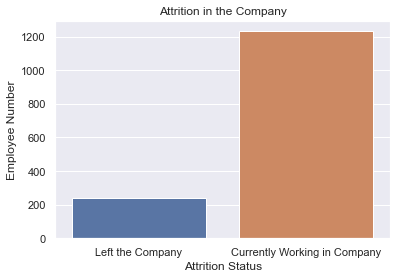

Currently Working in Company    1233
Left the Company                 237
Name: Attrition, dtype: int64

In [29]:
# Checking for number of employees working in the company
target = new_df['Attrition'].apply(lambda x: 'Currently Working in Company' if x == 0 else 'Left the Company')
sns.countplot(target)
plt.title('Attrition in the Company')
plt.xlabel('Attrition Status')
plt.ylabel('Employee Number')
plt.show()
target.value_counts()

In the company, there are total 1470 employees.from which 237 employees who compose about 16% of the total number of employee left the company for some reasons.
1233 employee is currently continuing to work in the same company.

In [30]:
# creating the functions so that it will get easy to check for the realtion among the different features
def table_df(x): 
    
    
    feature = new_df.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee ', 'Attrition Number', 
                       '% of Attrition in the Relevant Group'] 
    feature['% of Attrition in the Company'] = (feature['Attrition Number'] / 237)*100
        
    return feature

# Create graph for each feature to compare its attrition in the company  in the data set

def graph_df(x, y = 'bar', z = 0):
    
    feature = new_df.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee', 'Attrition Number', 
                       '% of Attrition in the Relevant Group'] 
    
    fig0, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    feature.set_index(feature[x], drop=True, inplace=True)
    feature['Total Employee'].plot(kind = y, stacked = True, ax = ax1, 
                                   colormap = 'winter', rot = z)
    feature['% of Attrition in the Relevant Group'].plot(use_index = False, 
                                                         kind = 'line', ax = ax2, colormap='Spectral')
    plt.title('Attrition compared to' + " " + x  + " " + "Groups")
    ax1.set_xlabel(x)
    ax1.yaxis.label.set_color('blue')
    ax1.set_ylabel("Total Employee")
    ax2.set_ylabel("Attrition Percentage in the Relevant Group")
    ax2.yaxis.label.set_color('blue')
    plt.tight_layout()
    plt.show()
    

# AGE

In [31]:

# Labeling different age groups in the dataset
table_df(x = 'Age')
bins = [17, 21, 25, 35, 60]
group_names = ['(18-21)', '(22-25)', '(26-35)', '(36-60)']
new_df['Age'] = pd.cut(new_df['Age'], bins, labels = group_names)

# Age Group & Attrition Table
table_df(x = 'Age')


,Age,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,(18-21),41,22,53.658537,9.282700
1,(22-25),82,22,26.829268,9.282700
2,(26-35),606,116,19.141914,48.945148
3,(36-60),741,77,10.391363,32.489451


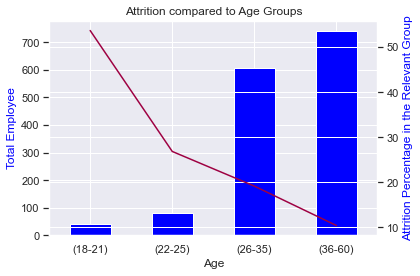

In [32]:
# Attrition Compared to Age Group Graph
graph_df(x = 'Age')

In 18-21 age group, young employees are more likely to leave the company.
Their attrition proportion to their age group is approximately 53.7% (22 out of 41) and that makes up 9% of all attrition (22 out of 237).

If we evaluate overall attrition number in the company, 26-35 age group's attrition number is the highest comparing to other age groups. In this age group, we have 19.1 % of employee attrition(116 out 606). That makes up approximately 49% of all attrition in the company (116 out of 237).

35-60 age group generally prefers to secure their job in the same company.

# Business Travel

In [34]:
# Business Travel & Attrition Table
table_df(x ='BusinessTravel')

,BusinessTravel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Non-Travel,150,12,8.000000,5.063291
1,Travel_Frequently,277,69,24.909747,29.113924
2,Travel_Rarely,1043,156,14.956855,65.822785


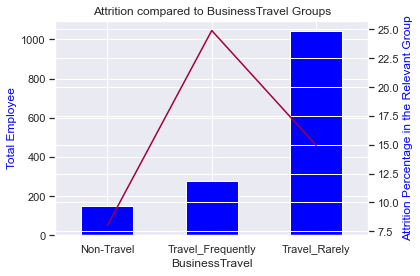

In [35]:
# Attrition compared to Business Travel Group Graph
graph_df(x = 'BusinessTravel')

In [36]:
# Department & Attrition Table
table_df(x = 'Department')

,Department,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Human Resources,63,12,19.047619,5.063291
1,Research & Development,961,133,13.839750,56.118143
2,Sales,446,92,20.627803,38.818565


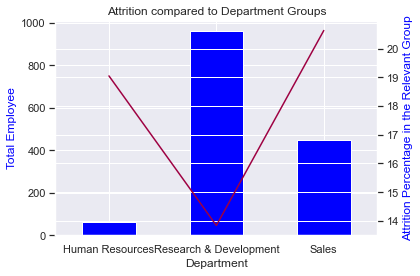

In [37]:
# Attrition compared to Department Graph
graph_df(x = 'Department')

There are three departments in the company. Research & Development Department has the most attrition number in the company. 13.8% of Research & Development Department employee left the organization. In numbers, it is equal to 133, which makes us the 56.1% of all attrition in the company. Actually, that attrition is a big number for company, but compared with other departments, Research & Development Department has the lowest attrition rate in itself as an individual department.

Sales Department has mostly been affected by the attrition. Because 20.6% of its employees left the organization. This is the highest number compared to the other two departments. That attrition makes up 38.8% of the attrition in the company (92 out of 237).

Human Resources Department follows the Sales Department in terms of being affected by attrition itself. 19% of that department employee left the company. But this is not that huge number in terms of whole attrition in company. Human Resources Department employee attrition makes up 5% of all attrition in the company (12 out of 237).

Distance From Home

In [39]:
# Labeling Distance From Home Groups
table_df(x = 'DistanceFromHome')
bins = [0, 3, 6, 10, 29]
group_names = ['1-3', '4-6', '7-10', '10+']
new_df['DistanceFromHome'] = pd.cut(new_df['DistanceFromHome'], bins, labels = group_names)


In [40]:
# Distance From Home Group & Attrition Table
table_df(x = 'DistanceFromHome')

,DistanceFromHome,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1-3,503,68,13.518887,28.691983
1,4-6,188,26,13.829787,10.970464
2,7-10,335,50,14.925373,21.097046
3,10+,444,93,20.945946,39.240506


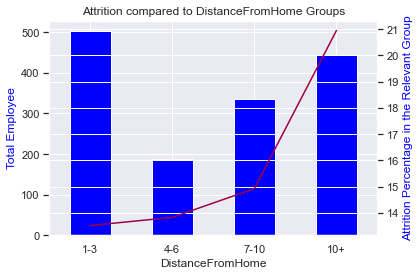

In [41]:
# Attrition compared to Distance From Home Graph
graph_df(x = 'DistanceFromHome')

Employees whose homes are 1-3 miles far away from the company compose approximately 1/3 of the whole company employee and their attrition rate is 28.7% of all company (68 out of 237).

Also, employees whose homes are 10+ miles far away from the company compose approximately the other 1/3 of the whole company employee and their attrition rate is 39.2% of all company (93 out of 237).

Attrition rate within its own distance group seems to increase as the distance from home increases.

Education

In [43]:
# Labeling education levels
table_df(x = 'Education')
new_df['Education'] = new_df['Education'].map({1:'Below College', 2:'College', 
                                         3:'Bachelor', 4:'Master', 5:'Doctor'})


In [44]:
# Education Level & Attrition Table
table_df(x = 'Education')

,Education,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Bachelor,572,99,17.307692,41.772152
1,Below College,170,31,18.235294,13.080169
2,College,282,44,15.602837,18.565401
3,Doctor,48,5,10.416667,2.109705
4,Master,398,58,14.572864,24.472574


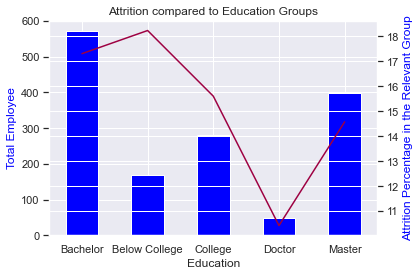

In [45]:
# Attrition compared to Education Level Graph
graph_df(x = 'Education')

Employees who have bachelor degree have the most attrition number (99 employees) in the company. That makes up 41.8% of all attrition in the company. Employees who have Ph.D. degree composes the least attrition number in the company.

Employees who have the master, college, and below college degrees are follower of employees who have bachelor degrees in terms of the attrition number in the company respectively.

Education Field



In [46]:
# Education Field & Attrition Table
table_df(x = 'EducationField')

,EducationField,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Human Resources,27,7,25.925926,2.953586
1,Life Sciences,606,89,14.686469,37.552743
2,Marketing,159,35,22.012579,14.767932
3,Medical,464,63,13.577586,26.582278
4,Other,82,11,13.414634,4.641350
5,Technical Degree,132,32,24.242424,13.502110


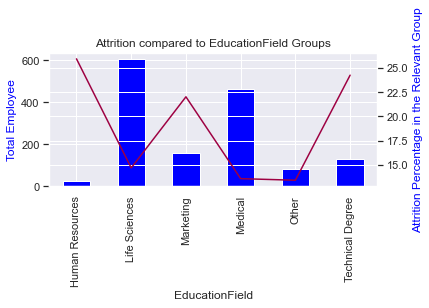

In [47]:
# Attrition compared to Education Field Graph
graph_df(x = 'EducationField', z = 90)

Employees who have Life Science education level have the most attrition number which makes up the 37.5% of all attrition (89 out of 237). But that composes only 14.7% of attrition within Life Sciences field.

Medical education level have the second highest attrition number which makes up the 13.57% of all attrition (63 out of 237). But that composes only 14.7% of attrition within Life Sciences field.

Besides that, Human Resources, Technical Degree, and Marketing fields are mostly affected by the attrition respectively. Their approximately 22-26% employees left the company.

Environment Satisfaction

In [53]:
# Labeling environment satisfaction
table_df(x = 'EnvironmentSatisfaction')
new_df['EnvironmentSatisfaction'] = new_df['EnvironmentSatisfaction'].map({1:'Low', 2:'Medium', 
                                                                     3:'High', 4:'Very High'})

In [55]:
# Environment & Attrition Table
table_df(x = 'EnvironmentSatisfaction')

,EnvironmentSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,453,62,13.686534,26.160338
1,Low,284,72,25.352113,30.379747
2,Medium,287,43,14.982578,18.143460
3,Very High,446,60,13.452915,25.316456


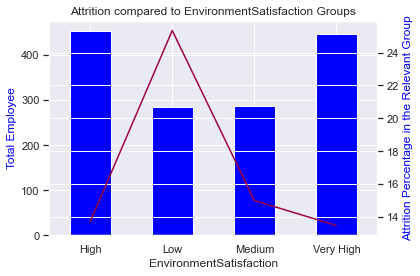

In [56]:
# Attrition compared to Environment Satisfaction Graph
graph_df(x = 'EnvironmentSatisfaction')

As it may be expected, there is a high attrition rate in the low satisfaction environment. That composes the 30.4 % of the whole company's attrition.

Shockingly, in the high and very high satisfaction environment, there are still 13.7 % of the these each group's employees leave the company. That attrition composes of the 51.5 % of the whole company's attrition. This result might tell us that environment satisfaction is not the one of the main reasons for attrition in the company.

Gender

In [57]:
# Gender & Attrition Table
table_df(x = 'Gender')

,Gender,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Female,588,87,14.795918,36.708861
1,Male,882,150,17.006803,63.291139


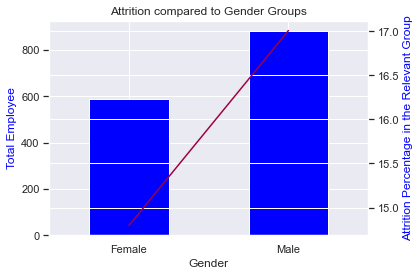

In [58]:
# Attrition compared to Gender Graph
graph_df(x = 'Gender')

Male employees are more likely to leave the company than female employees.

Job Involvement

In [64]:
# Labeling Job Involvement Groups
table_df(x = 'JobInvolvement')
new_df['JobInvolvement'] = new_df['JobInvolvement'].map({1:'Low', 2:'Medium', 
                                                   3:'High', 4:'Very High'})


In [70]:
# Job Involvement & Attrition Table
table_df(x = 'JobInvolvement')

,JobInvolvement,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company


Job Level

In [67]:
# Labeling job levels
table_df(x = 'JobLevel')
new_df['JobLevel'] = new_df['JobLevel'].map({1:'Level-1', 2:'Level-2', 
                                       3:'Level-3', 4:'Level-4', 5:'Level-5'})

In [68]:
# Job Level & Attrition Table
table_df(x = 'JobLevel')

,JobLevel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Level-1,543,143,26.335175,60.337553
1,Level-2,534,52,9.737828,21.940928
2,Level-3,218,32,14.678899,13.502110
3,Level-4,106,5,4.716981,2.109705
4,Level-5,69,5,7.246377,2.109705


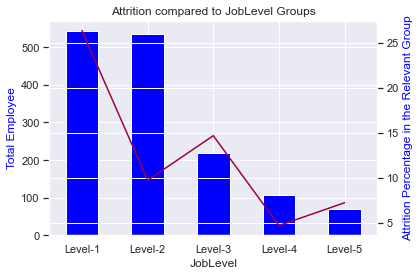

In [69]:
# Attrition compared to Job Level Graph
graph_df(x = 'JobLevel')

With an increase in job level, there is a decrease in attrition number throughout the company. The highest attrition is observed in the job level-1. 143 employees in the job level-1, who compose the 60.3% of all attrition, left the company.

Job Role

In [72]:
# Job Role & Attrition Table
table_df(x = 'JobRole')

,JobRole,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Healthcare Representative,131,9,6.870229,3.797468
1,Human Resources,52,12,23.076923,5.063291
2,Laboratory Technician,259,62,23.938224,26.160338
3,Manager,102,5,4.901961,2.109705
4,Manufacturing Director,145,10,6.896552,4.219409
5,Research Director,80,2,2.500000,0.843882
6,Research Scientist,292,47,16.095890,19.831224
7,Sales Executive,326,57,17.484663,24.050633
8,Sales Representative,83,33,39.759036,13.924051


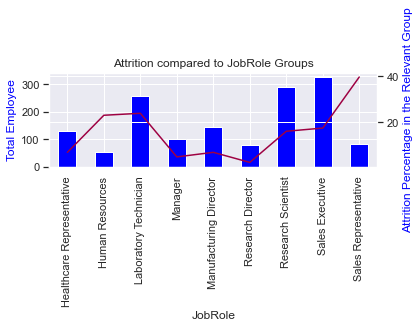

In [73]:
# Attrition compared to Job Role Graph
graph_df(x = 'JobRole', z = 90)

Laboratory Technician has the most attrition number with the 26.2% of all attrition in the company (62 out of 237 employees). Sales Executive and Research Scientist are following the Laboratory Technician in attrition throughout the company with the 57 and 47 employees respectively. Those both job roles' attrition composes 44% of whole company's attrition.

Sales Representative role has been affected mostly by the attrition. Sales Representative has lost approximately 40% of its' employee. Laboratory Technician and Human Resources followed it in terms of losing employee as a job role.

On the other hand, Research Director job role has the lowest attrition number not only in the company (2.5%) but only within its own job role(0.8%).

Job Satisfaction

In [75]:
# Labeling Job Role 
table_df(x = 'JobSatisfaction')
new_df['JobSatisfaction'] = new_df['JobSatisfaction'].map({1:'Low', 2:'Medium',
                                                     3:'High', 4:'Very High'})   

In [76]:
# Job Satisfaction & Attrition Table
table_df(x = 'JobSatisfaction')

,JobSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,442,73,16.515837,30.801688
1,Low,289,66,22.837370,27.848101
2,Medium,280,46,16.428571,19.409283
3,Very High,459,52,11.328976,21.940928


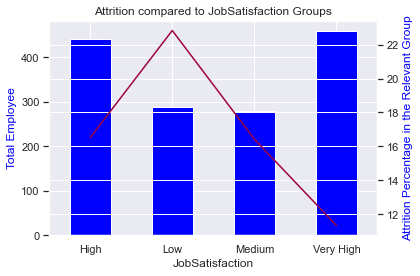

In [77]:
# Attrition compared to Job Satisfaction
graph_df(x = 'JobSatisfaction')

In high job satisfaction, surprisingly employees leave the company most and their attrition composes 30.8% of company's attrition. From this picture, I assume that job satisfaction should not be the main reason for employees to leave the company.

As it may be expected, in low job satisfaction, employees leave the company more than other groups except high satisfaction. They compose 27.8% of all attrition in the company.

Marital Status

In [78]:
# Job Satisfaction & Attrition Table
table_df(x = 'MaritalStatus')

,MaritalStatus,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Divorced,327,33,10.091743,13.924051
1,Married,673,84,12.481426,35.443038
2,Single,470,120,25.531915,50.632911


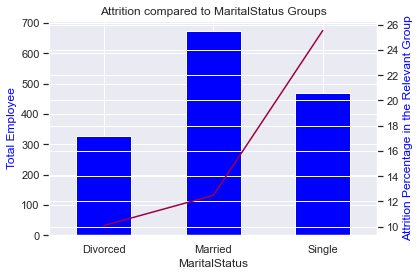

In [79]:
# Attrition compared to Job Satisfaction
graph_df(x = 'MaritalStatus')

Single employees are more likely to leave the company. They have the highest attrition number and compose of the 50.6% employees who left the company. Married and Divorced employees are the followers of Single employees in the attrition number of the company respectively.

Monthly Income

In [80]:
# Labeling Monthly Income Level
table_df(x = "MonthlyIncome")
bins = [1000, 2000, 3000, 4000, 5000, 7500, 9000, 11000, 15000, 20000]
group_names = ['1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-7500', 
               '7500-9000', '9000-11000', '11000-15000', '15000-20000']             
new_df["MonthlyIncome"] = pd.cut(new_df["MonthlyIncome"], bins, labels = group_names)

In [81]:
# Monthly Income & Attrition Table
table_df(x = "MonthlyIncome")

,MonthlyIncome,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1000-2000,33,18,54.545455,7.594937
1,2000-3000,362,95,26.243094,40.084388
2,3000-4000,148,24,16.216216,10.126582
3,4000-5000,206,26,12.621359,10.970464
4,5000-7500,310,30,9.677419,12.658228
5,7500-9000,78,10,12.820513,4.219409
6,9000-11000,118,22,18.644068,9.282700
7,11000-15000,82,7,8.536585,2.953586
8,15000-20000,133,5,3.759398,2.109705


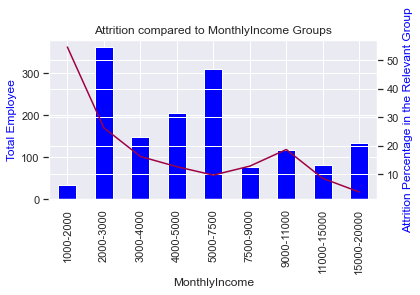

In [82]:
# Attrition compared to Monthly Income Level Graph
graph_df(x = "MonthlyIncome", z = 90)

2000-3000 dollars monthly income level, there is a high attrition and it compose the 40% of attrition in the company.

1000-2000 dollars monthly income level, there is a high attrition in its own income group level, which is 54.5%.

As the monthly income increase, it is observed that there is a decrease in attrition. But, in 9000-11000 dollars monthly income level, there is a rise in attrition of its own monthly income group level.



Numbers Companies Worked

In [84]:
# Labeling Numbers Companied Worked Groups
table_df(x = 'NumCompaniesWorked')
bins = [0, 1, 2, 3, 4, 5, 10]
group_names = ['0', '1', '2', '3', '4', '5+']             
new_df['NumCompaniesWorked'] = pd.cut(new_df['NumCompaniesWorked'], bins, labels = group_names, 
                                        include_lowest = True, right = False)

In [85]:
# Numbers Companied Worked & Attrition Table
table_df(x = 'NumCompaniesWorked')

,NumCompaniesWorked,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,197,23,11.675127,9.704641
1,1,521,98,18.809981,41.350211
2,2,146,16,10.958904,6.751055
3,3,159,16,10.062893,6.751055
4,4,139,17,12.230216,7.172996
5,5+,308,67,21.753247,28.270042


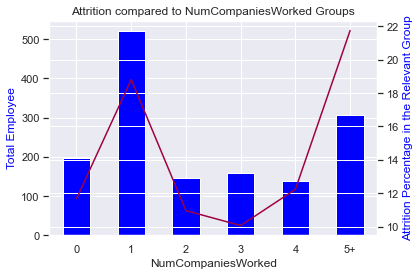

In [86]:
# Attrition compared to Numbers of Companies Worked Graph
graph_df(x = 'NumCompaniesWorked')

If employees have one company experience before current company, they are more likely to leave the company. They have the highest attrition number and compose of 41.3% all attrition in the company. Besides, if employees don't have any experience in other company, they have the second most attrition number.

Also, employees, who has more experience such as working in 5,6,7, and 9 companies before the current company, have the highest attrition in their individual experienced group.

Over Time

In [87]:
# Numbers Companied Worked & Attrition Table
table_df(x = 'OverTime')

,OverTime,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,No,1054,110,10.436433,46.413502
1,Yes,416,127,30.528846,53.586498


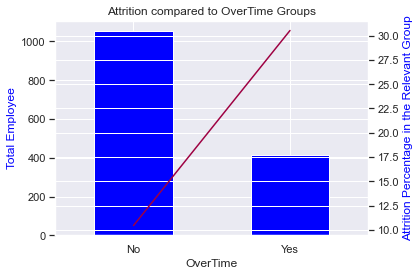

In [88]:
# Attrition compared to Numbers of Companies Worked Graph
graph_df(x = 'OverTime')

28.3% of employees have the over time work in the company and they have higher attrition number than employees who don't have. There is not a significant difference between these two groups' attrition number. But if you compare individually both groups, over time employees are much more likely to leave the company.

Percent Salary Hike

In [90]:
# Percent Salary Hike & Attrition Table
table_df(x = 'PercentSalaryHike')
bins = [10, 14, 18, 22, 25]
group_names = ['11-14', '15-18', '19-22', '23-25']             
new_df['PercentSalaryHike'] = pd.cut(new_df['PercentSalaryHike'], bins, labels = group_names)

In [91]:
# Percent Salary Hike & Attrition Table
table_df(x = 'PercentSalaryHike')

,PercentSalaryHike,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,11-14,818,132,16.136919,55.696203
1,15-18,350,59,16.857143,24.894515
2,19-22,235,33,14.042553,13.924051
3,23-25,67,13,19.402985,5.485232


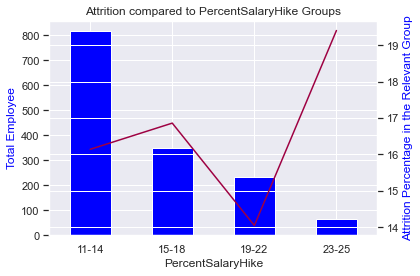

In [92]:
# Attrition compared to Percent Salary Hike
graph_df(x = 'PercentSalaryHike')

As it may be expected, the higher percent salary hike is, the more employees are likely and willingly to stay in the current company. The employees who have the highest percent salary hikes are more likely to leave the company. The reason for that might be due to the fact that they are more qualified and have the chance to find better position in other companies or due to the retirement.

Performance Rating

In [93]:
# Performance Rating & Attrition Table
table_df(x = 'PerformanceRating')

,PerformanceRating,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,3,1244,200,16.077170,84.388186
1,4,226,37,16.371681,15.611814


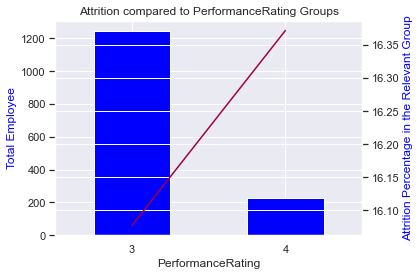

In [94]:
# Attrition compared to Performance Rating
graph_df(x = 'PerformanceRating')

Performance rating has two category such as 3 and 4. 84.6% of employees are in the performance rating 3 group and 16.08 attrition. The rest of the employees are in performance rating 4 group and their attrition percentage(%16.37) is a little bit higher than previous group.

Relationship Satisfaction

In [96]:
# Labeling Relationship Satisfaction Levels
table_df(x = 'RelationshipSatisfaction')
new_df['RelationshipSatisfaction'] = new_df['RelationshipSatisfaction'].map({1:'Low', 2:'Medium', 
                                                                       3:'High', 4:'Very High'})

In [97]:
# Relationship & Attrition Table
table_df(x = 'RelationshipSatisfaction')

,RelationshipSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,459,71,15.468410,29.957806
1,Low,276,57,20.652174,24.050633
2,Medium,303,45,14.851485,18.987342
3,Very High,432,64,14.814815,27.004219


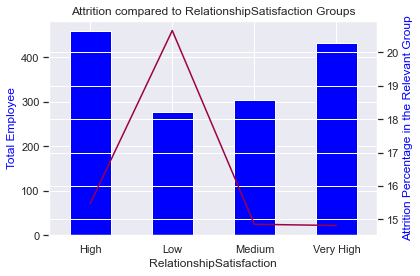

In [98]:
# Attrition compared to Relationship Satisfaction Graph
graph_df(x = 'RelationshipSatisfaction')

Relationship satisfaction is aligned with high and very high in the company. But, still High and very high relationship satisfaction level have the most attrition number respectively and compose of 52.7% all attrition in the company.

Besides that, the highest attrition percentage in the satisfaction group is low as it might be expected (20.7% of attrition in the low relationship satisfaction level.

Stock Option Level

In [99]:
# Relationship & Attrition Table
table_df(x = 'StockOptionLevel')

,StockOptionLevel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,631,154,24.405705,64.978903
1,1,596,56,9.395973,23.628692
2,2,158,12,7.594937,5.063291
3,3,85,15,17.647059,6.329114


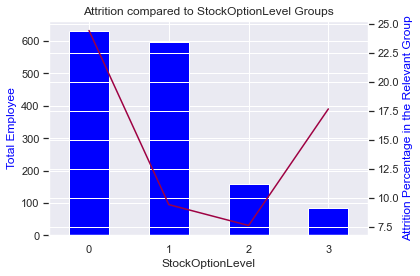

In [100]:
# Attrition compared to Stock Option Level Graph
graph_df(x = 'StockOptionLevel')

If stock option level is 0, there occurs a huge attrition in the company and it composes the 65% of the all attrition in the company. Besides, as the stock option level increase, there is a decrease in attrition number.

Total Working Years

In [102]:
# Total Working Years & Attrition Table
table_df(x = 'TotalWorkingYears')
bins = [0, 1, 5, 10, 15, 20, 40]
group_names = ['1', '2-5', '6-10', '11-15', '16-20', '20+']             
new_df['TotalWorkingYears'] = pd.cut(new_df['TotalWorkingYears'], bins, labels = group_names, 
                                  include_lowest = True)

In [103]:
# Total Working Years & Attrition Table
table_df(x = 'TotalWorkingYears')

,TotalWorkingYears,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,92,45,48.913043,18.987342
1,2-5,224,46,20.535714,19.409283
2,6-10,607,91,14.991763,38.396624
3,11-15,191,24,12.565445,10.126582
4,16-20,149,15,10.067114,6.329114
5,20+,207,16,7.729469,6.751055


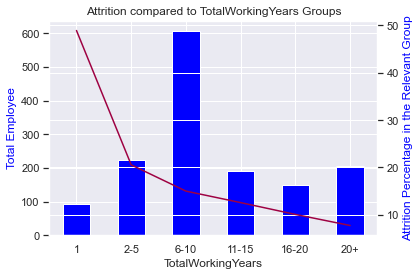

In [104]:
graph_df(x = 'TotalWorkingYears')

Employees who have one year or less working experience are more likely to leave the company and compose the 18.98% of all attrition throughout the company. In addition to that, employees who have 6-10 years' experience have also second highest attrition percentage throughout the company and it compose the 38.4% of all attrition.

Training Times Last Year

In [105]:
# Training Times Last Year & Attrition Table
table_df(x = 'TrainingTimesLastYear')

,TrainingTimesLastYear,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,54,15,27.777778,6.329114
1,1,71,9,12.676056,3.797468
2,2,547,98,17.915905,41.350211
3,3,491,69,14.052953,29.113924
4,4,123,26,21.138211,10.970464
5,5,119,14,11.764706,5.907173
6,6,65,6,9.230769,2.531646


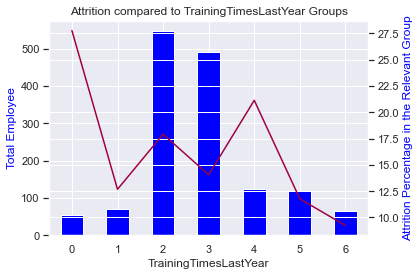

In [106]:
# Attrition compared to Training Times Last Year Graph
graph_df(x = 'TrainingTimesLastYear')

Employees who has 2 and 3 times training last year has the most attrition number respectively and both of their attrition compose the 70.5% of all attrition in the company. Employees who don't have training time beforehand has the highest attrition number in its individual group.

Work Life Balance

In [108]:
# Labeling Work Life Balance Groups
table_df(x = 'WorkLifeBalance')
new_df['WorkLifeBalance'] = new_df['WorkLifeBalance'].map({1:'Bad', 2:'Good', 
                                                     3:'Better', 4:'Best'})

In [109]:
# Work Life Balance & Attrition Table
table_df(x = 'WorkLifeBalance')

,WorkLifeBalance,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Bad,80,25,31.250000,10.548523
1,Best,153,27,17.647059,11.392405
2,Better,893,127,14.221725,53.586498
3,Good,344,58,16.860465,24.472574


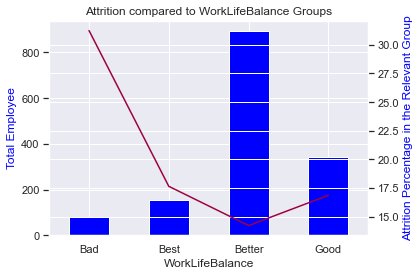

In [110]:
# Attrition compared to Work Life Balance Graph
graph_df(x = 'WorkLifeBalance')

In general, work life balance is satisfactorily good throughout the company. But we have the highest attrition number and percentage throughout the company.

Besides, bad work life balance group has highest attrition percentage in its individual group.

Years at Company

In [111]:
# Labeling Years at Company Groups
table_df(x = 'YearsAtCompany')
bins = [0, 1, 5, 10, 40]
group_names = ['1', '2-5', '6-10', '10+']             
new_df['YearsAtCompany'] = pd.cut(new_df['YearsAtCompany'], bins, labels = group_names, 
                               include_lowest = True)

In [112]:
# Years at Company & Attrition Table
table_df(x = 'YearsAtCompany')

,YearsAtCompany,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,215,75,34.883721,31.645570
1,2-5,561,87,15.508021,36.708861
2,6-10,448,55,12.276786,23.206751
3,10+,246,20,8.130081,8.438819


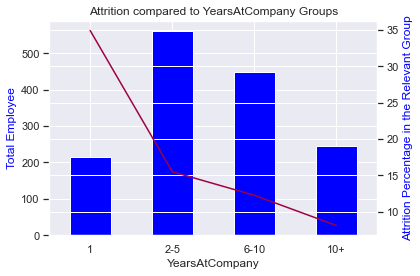

In [113]:
# Years at Company & Attrition Graph 
graph_df(x = 'YearsAtCompany')

Employees who have one year or less working experience in the company has the highest attrition percentage in its individual experience group (34.9% of attrition in the relevant group). Besides that, highest attrition number, which is 87 employees, is in the 2-5 years working experience at the company and that composes of the 36.7 % of all attrition in the company.

Years in Current Role

In [115]:
# Labeling Years in Current Role Groups
table_df(x = 'YearsInCurrentRole')
bins = [0, 1, 4, 6, 7, 10, 18]
group_names = ['1', '2-4', '5-6', '7', '8-10', '10+']             
new_df['YearsInCurrentRole'] = pd.cut(new_df['YearsInCurrentRole'], bins, labels = group_names, 
                                   include_lowest = True)

In [116]:
# Years at Company & Attrition Table
table_df(x = 'YearsAtCompany')

,YearsAtCompany,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,215,75,34.883721,31.645570
1,2-5,561,87,15.508021,36.708861
2,6-10,448,55,12.276786,23.206751
3,10+,246,20,8.130081,8.438819


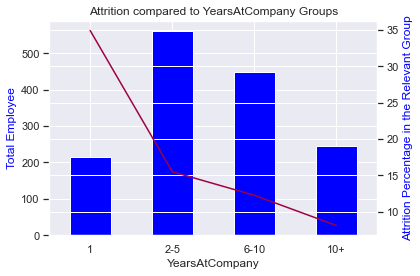

In [117]:
# Years in Current Role & Attrition Graph 
graph_df(x = 'YearsAtCompany')

Employees who don't fulfill their first year and in their first year in their current role are more likely to leave the company. That might be result of challenge or not satisfied with the current role.

Employees who have 2-5 years' experience in that company compose of the maximum attrition percentage and number in the company.

Besides that, after years in current role, employees are willing to leave the company. That might be result of looking for better opportunities in other companies.

Years Since Last Promotion

In [119]:
# Labeling Years in Current Role Groups
table_df(x = 'YearsSinceLastPromotion')
bins = [0, 1, 2, 3, 4, 7, 8, 16]
group_names = ['0', '1', '2', '3', '4-6', '7', '8+']             
new_df['YearsSinceLastPromotion'] = pd.cut(new_df['YearsSinceLastPromotion'], bins, labels = group_names, 
                                        include_lowest = True, right = False)

In [120]:
# Years Since Last Promotion & Attrition Table
table_df(x = 'YearsSinceLastPromotion')

,YearsSinceLastPromotion,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,581,110,18.932874,46.413502
1,1,357,49,13.725490,20.675105
2,2,159,27,16.981132,11.392405
3,3,52,9,17.307692,3.797468
4,4-6,138,13,9.420290,5.485232
5,7,76,16,21.052632,6.751055
6,8+,107,13,12.149533,5.485232


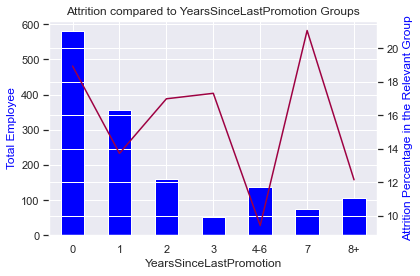

In [121]:
# Years Since Last Promotion & Attrition Graph
graph_df(x = 'YearsSinceLastPromotion')

Employees who don't fulfill his one year since the last promotion in the company are more likely to leave the company(46.4% of all attrition). And employees who have one and two years experience in the current company since the last promotion have the highest attrition number after the above group in the company respectively. 7 years since last promotion has the highest attrition in its individual group.

Years with Current Manager

In [123]:
# Labeling Years with Current Manager Groups
table_df(x = 'YearsWithCurrManager')
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 18]
group_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']             
new_df['YearsWithCurrManager'] = pd.cut(new_df['YearsWithCurrManager'], bins, labels = group_names, 
                                     include_lowest = True, right = False)

In [124]:
# Years with Current Manager & Attrition Table
table_df(x = 'YearsWithCurrManager')

,YearsWithCurrManager,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,263,85,32.319392,35.864979
1,1,76,11,14.473684,4.641350
2,2,344,50,14.534884,21.097046
3,3,142,19,13.380282,8.016878
4,4,98,11,11.224490,4.641350
5,5,31,4,12.903226,1.687764
6,6,29,4,13.793103,1.687764
7,7,216,31,14.351852,13.080169
8,8,107,10,9.345794,4.219409
9,9,64,6,9.375000,2.531646


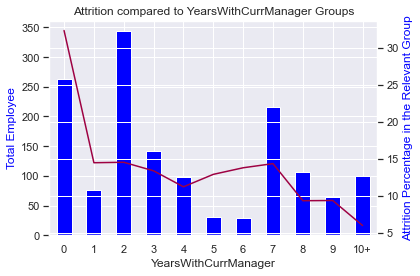

In [125]:
# Years with Current Manager & Attrition Graph
graph_df(x = 'YearsWithCurrManager')

Most of the employee quit the company before completing their first year with their current manager. Other group who leaves the company most is the ones who work two years with current manager.

In [126]:
# Years with Current Manager & Attrition Table
table_df(x = 'HourlyRate')

,HourlyRate,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,30,19,0,0.000000,0.000000
1,31,15,2,13.333333,0.843882
2,32,24,4,16.666667,1.687764
3,33,19,3,15.789474,1.265823
4,34,12,5,41.666667,2.109705
...,...,...,...,...,...
66,96,27,4,14.814815,1.687764
67,97,21,3,14.285714,1.265823
68,98,28,3,10.714286,1.265823
69,99,20,4,20.000000,1.687764


Other Features

I also checked the 'Employee Number', 'Daily Rate', 'Hourly Rate' and 'Monthly Rate' features as I did the in previous features of dataset. But there is nothing significant to comment or visualize about these features. For that reason, I didn't include them in my notebook.

Feature/Variable Relationships:
Here we will take a look at how variables related to each other. There are various methods/visualizations for this. I will use correlation matrix (heat map) for this purpose.

Correlation means association - more precisely it is a measure of the extent to which two variables are related. There are three possible results of a correlational study: a positive correlation, a negative correlation, and no correlation. A positive correlation is a relationship between two variables in which both variables either increase or decrease at the same time. An example would be height and weight. Taller people tend to be heavier. A negative correlation is a relationship between two variables in which an increase in one variable is associated with a decrease in the other. An example would be height above sea level and temperature. As you climb the mountain (increase in height) it gets colder (decrease in temperature). A zero correlation exists when there is no relationship between two variables. For example, there is no relationship between the amount of tea drunk and level of intelligence.

Correlation Matrix

<AxesSubplot:>

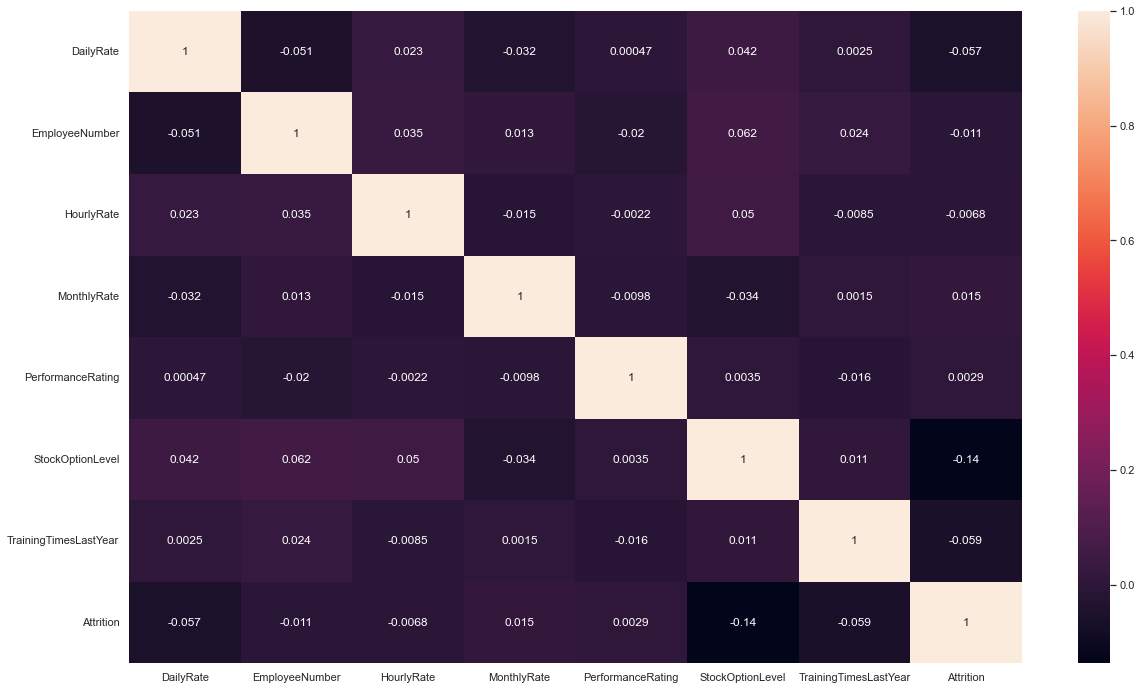

In [128]:
corr_matrix = new_df.corr()
f , ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_matrix, vmax=1, annot=True)

Based on the fact which is given strength of correlation chart, we can identify the features which have strong, moderate, weak and zero correlations between each other. I will just outline the strong and moderate correlations here.

Features which have strong correlations:

Percent Salary Hike and Performance Rating,

Total Working Years, Monthly Income and Job Level,

Years at Company, Years with Current Manager, and Years in Current Role,

Features which have moderate correlations:

Age has moderate correlation with Total Working Years, Monthly Income, and Job Level,

Job Level has moderate correlation with Years at Company and Age,

Total Working Years has moderate correlation with Years with Current Manager, Years Since Last Promotion, Years in Current Role, Years at Company, and Age,

Years at Company has moderate correlation with Years Since Last Promotion, Total Working Years, Monthly Income, Job Level,

Years in Current Role has moderate correlation with Years Since Last Promotion, Total Working Years,

Years Since Last Promotion has moderate correlation with Years with Current Manager, Years in Current Role, Years at Company, Total Working Years,

Years with Current Manager has moderate correlation with Years Since Last Promotion, Total Working Years.

Summary for Exploratory Data Analysis
There are 1470 employees in the company and 16% of them left the company. We have some data about employees to examine the attrition reasons. To sum our exploratory data analysis;

Young employees (18-25 years old) compose the 8.4% of the company and they are more likely to leave the company than other age groups. As the employees get older, their attrition percentages drop.

Employees who travel rarely or don't travel according to their job description compose the 81.1% of entire company. 18.8% of the employees travels frequently and they have the highest attrition percentage(25%).

30.3% of employees work in the Sales department and they have the highest attrition percentage (20.6%). Human Resources employees who compose the 4.3% of company, are the second highest attrition percentage(19%). Research and Development Department has 65.4% employee in the company and they have the lowest attrition percentage(13.8%).

As the distance between company and employees’ homes increases, the attrition percentage increases.

11.6% of employees has below college degree and highest attrition percentage(18.2%). Other attrition percentages according to education levels: 39% of employees has the bachelor’s degree and 17.3% attrition. 19.2% of employees has the college degree and 15.6% attrition. 27.1% of employees has the master’s degree and 14.6% attrition. 3.3% of employees has the doctorate degree and 10.4% attrition.
According to the education field, 1.8% of employees has Human Resources education field and highest attrition(25.9%). 8.9% employees have Technical degree education field and 24.2% attrition. 10.8% of employees has Marketing education field and 22% attrition. Life Sciences, Medical and other education fields are affected respectively.

61.2% of employees has environment satisfaction at very high/high level in the company. 19.3% of employees has low environment satisfaction and 25.3% attrition.

Male employees(60% of company) are more likely to leave the company than female employees.

68.8% of employees has high/very high job involvement in the company. As the job involvement increases, the attrition percentage decreases respectively.

37% of employees has job level-1 and 26.3% attrition. Job level-3(14.8% of the company) and job level-2(36.3% of the company) are affected mostly by %14.7 and 9.7% attrition after job level-1 respectively.

5.6% of employees works as Sales Representative and they have the highest attrition(39.8%). Laboratory Technician (17.6% of employees) and Human Resources (3.5% of employees) job role follows the Sales Representative attrition percentage by 23.9% and 23.07% respectively. Besides those job roles, Sale Executive (22.8% of the employees have 17.5% attrition) and Research Scientist (19.9% of employees have 16.1% attrition) have the higher attrition percentage than others.

61.3% of employees has high/very high job satisfaction in the company. 19.7% of employees have low job satisfaction and highest attrition percentage(22.8%). As the job satisfaction increase, attrition percentage decreases. Medium(19% of employees) and high(30% of employees) job satisfaction has approximately same attrition percentage(16.5%).

32% of employees are single and has the highest attrition percentage(25.5%).
26.9% of employees have 1000-3000 dollars monthly income and highest attrition percentage(47.7%). Other monthly income employees have been affected by attrition in the same percentage level except 9000-11000 dollars monthly income level. That group is 5.6% of employees and has 18.6% attrition.

35.4% of employees have one company experience before current company, and they are more likely to leave the company(18.8%). 21% of employees worked in 5 and more companies before this company and have 21.8% attrition. 28.3% of employees have over time and 30.5% attrition in the company while rest of the employees have only 10.4% attrition.

The higher percent salary hike is, the more employees are likely and willingly to stay in the current company.

Performance rating has two category such as 3 and 4. 84.6% of employees are in the performance rating 3 group and 16.08 attrition. The rest of the employees are in performance rating 4 group and their attrition percentage(%16.37) is a little bit higher than previous group.

18.8% of employees have low relationship satisfaction and highest attrition percentage(20.7%). The rest of the employees’ attrition percentage is at 15% band level.

43% of employees has zero stock option level and highest attrition percentage(24.4%). There is a sharp decrease in attrition percentage until stock option level-3. %5.7 of employees has stock option level-3 and 17.4% attrition.

As the total working years increases, the attrition percentage decreases in the relevant experience groups.

70.6% of employees have 2-3 times training in the previous year and have 17.9% and 14.1% attrition respectively. 3.7% of employees does not have training times in the previous year and has the highest attrition percentage(27.8%). 8.3% of employees have 4 times training last year and have 21.1% attrition. The rest of the employees’ attrition percentage is around between 9% and 12%. 84.2% of employees have good or better work life balance, and 16.7% and 14.2% attrition respectively. 5.4% of employees have bad work life balance and the highest attrition percentage(31.3%). As the years at company and current role increase, attrition percentage decreases in the company.
39.5% of employees leaves the company before fulfilling one year since their last promotion. 24.3% of employees fulfilling one year since their last promotion has the 13.7 attrition percentage. 7 years since last promotion employee group (5.2%) has the highest attrition(21.1%) in its individual group.

Most of the employee(17.9%) quit the company before completing their first year with their current manager(32.3% attrition). Other group who leaves the company most is the ones who work two years with current manager(23.4% of employees with 14.5% attrition).

I also checked the 'Employee Number', 'Daily Rate', 'Hourly Rate' and 'Monthly Rate' features as I did the in previous features of dataset. But there is nothing significant to comment or visualize about these features.

Thank you!!!!!